# Grid Searches

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

In [3]:
from sklearn.svm import SVC

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]

## Manual Variant

In [4]:
from sklearn.cross_validation import cross_val_score

for C in Cs:
    for gamma in gammas:
        scores = cross_val_score(SVC(C=C, gamma=gamma), X, y)
        print("C: %f, gamma: %f, average score: %f" % (C, gamma, np.mean(scores)))

C: 0.001000, gamma: 0.001000, average score: 0.913807
C: 0.001000, gamma: 0.010000, average score: 0.913807
C: 0.001000, gamma: 0.100000, average score: 0.919935
C: 0.001000, gamma: 1.000000, average score: 0.953840
C: 0.010000, gamma: 0.001000, average score: 0.913807
C: 0.010000, gamma: 0.010000, average score: 0.913807
C: 0.010000, gamma: 0.100000, average score: 0.919935
C: 0.010000, gamma: 1.000000, average score: 0.953840
C: 0.100000, gamma: 0.001000, average score: 0.913807
C: 0.100000, gamma: 0.010000, average score: 0.913807
C: 0.100000, gamma: 0.100000, average score: 0.926879
C: 0.100000, gamma: 1.000000, average score: 0.966912
C: 1.000000, gamma: 0.001000, average score: 0.913807
C: 1.000000, gamma: 0.010000, average score: 0.947304
C: 1.000000, gamma: 0.100000, average score: 0.973448
C: 1.000000, gamma: 1.000000, average score: 0.973856
C: 10.000000, gamma: 0.001000, average score: 0.947304
C: 10.000000, gamma: 0.010000, average score: 0.973448
C: 10.000000, gamma: 0.100

## GridSearchCV

In [5]:
from sklearn.grid_search import GridSearchCV

param_grid = {'C': Cs, 'gamma' : gammas}

print(param_grid)

{'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}


In [6]:
grid_search = GridSearchCV(SVC(), param_grid, verbose=3, cv=5)

In [7]:
grid_search.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.001, gamma=0.001 ............................................
[CV] ................... C=0.001, gamma=0.001, score=0.866667 -   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ................... C=0.001, gamma=0.001, score=0.966667 -   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ................... C=0.001, gamma=0.001, score=0.833333 -   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ................... C=0.001, gamma=0.001, score=0.966667 -   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ................... C=0.001, gamma=0.001, score=0.933333 -   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .................... C=0.001, gamma=0.01, score=0.866667 -   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] ..........

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [8]:
grid_search.best_params_

{'C': 1, 'gamma': 0.1}

In [9]:
grid_search.best_score_

0.97999999999999998

We extract just the score

([<matplotlib.axis.YTick at 0x9054860>,
 <a list of 5 Text yticklabel objects>)

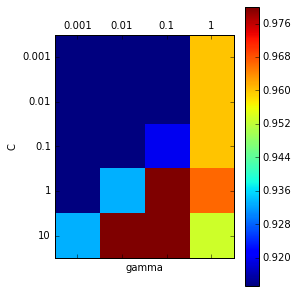

In [11]:
scores = [x[1] for x in grid_search.grid_scores_]
scores = np.array(scores).reshape(5, 4)

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(4), param_grid['gamma'])
plt.yticks(np.arange(5), param_grid['C'])

## Avoid Overfitting with Hyper-Parameters

In [12]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
grid_search = GridSearchCV(SVC(), param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [14]:
grid_search.predict(X_test)

array([2, 0, 0, 2, 0, 1, 0, 1, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1,
       1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1])

In [15]:
grid_search.score(X_test, y_test)

0.97368421052631582

## Nested Cross-Validation

In [16]:
cross_val_score(grid_search, X, y, cv = 5)

array([ 0.96666667,  1.        ,  0.96666667,  0.96666667,  1.        ])